In [60]:
%matplotlib inline
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
from bokeh.embed import components 
from datetime import datetime as dt

In [85]:
ticker = 'GOOG'
features  = ['Close', 'Open', 'Adj. Open', 'Adj. Close']
api_url = 'https://www.quandl.com/api/v1/datasets/WIKI/%s.json' % ticker
session = requests.Session()
session.mount('http://', requests.adapters.HTTPAdapter(max_retries=3))
raw_data = session.get(api_url)
data_df = pd.DataFrame(columns = raw_data.json()['column_names'], data  = raw_data.json()['data'])
data_df.Date = data_df.Date.apply(lambda x: dt.strptime(x, '%Y-%m-%d'))

plot = figure(title='Data from Quandle WIKI set for '+ ticker,
              x_axis_label='Date',
              x_axis_type='datetime',
              y_axis_label = 'Price')

color_dic = {'Open':'green', 'Close': 'red', 'Adj. Open': 'yellow', 'Adj. Close': 'purple'}

for feature in features:
    plot.line(data_df['Date'], data_df[feature], legend = ticker + ":" + feature,\
              line_width=1, line_color=color_dic[feature])
show(plot)


In [16]:
data_df = pd.DataFrame(columns = raw_data.json()['column_names'], data  = raw_data.json()['data'])

In [24]:
data_df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2017-09-08,936.49,936.990,924.88,926.50,993832.0,0.0,1.0,936.49,936.990,924.88,926.50,993832.0
1,2017-09-07,931.73,936.410,923.62,935.95,1200257.0,0.0,1.0,931.73,936.410,923.62,935.95,1200257.0
2,2017-09-06,930.15,930.915,919.27,927.81,1468808.0,0.0,1.0,930.15,930.915,919.27,927.81,1468808.0
3,2017-09-05,933.08,937.000,921.96,928.45,1202163.0,0.0,1.0,933.08,937.000,921.96,928.45,1202163.0
4,2017-09-01,941.13,942.480,935.15,937.34,913404.0,0.0,1.0,941.13,942.480,935.15,937.34,913404.0


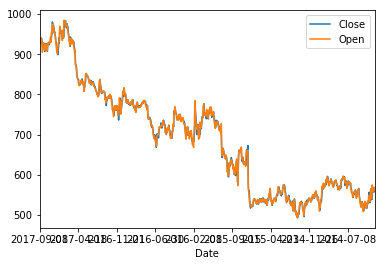

In [34]:
data_df[['Date']+features].plot(x = 'Date')
plt.show()

In [51]:
output_notebook()

Loading BokehJS ...

In [75]:
data_df.Date = data_df.Date.apply(lambda x: dt.strptime(x, '%Y-%m-%d'))

In [86]:
components(plot)

('\n<script type="text/javascript">\n    (function() {\n  var fn = function() {\n    Bokeh.safely(function() {\n      var docs_json = {"2ef2cebe-d185-49bc-b835-0305a7f1b121":{"roots":{"references":[{"attributes":{},"id":"a88fee0f-ce6d-48a6-9a42-077ac62e6676","type":"BasicTickFormatter"},{"attributes":{"callback":null},"id":"bbc06af2-0fa1-4a28-ad86-5a33dc3ef1c0","type":"DataRange1d"},{"attributes":{"callback":null},"id":"862e482e-2a3a-466c-b279-ffd6a021a9aa","type":"DataRange1d"},{"attributes":{"days":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]},"id":"b01b8dcb-6093-4078-a5f1-6b02ba76eee4","type":"DaysTicker"},{"attributes":{"max_interval":500.0,"num_minor_ticks":0},"id":"065d72ba-eeb8-4737-9531-bc3586ceb789","type":"AdaptiveTicker"},{"attributes":{"callback":null},"id":"7fd5277e-12cd-4e72-b7e7-999bb81f8d10","type":"DataRange1d"},{"attributes":{"data_source":{"id":"bb22180d-875d-4bc9-bc09-400d09439937","type":"ColumnDataSource"},"glyph":{"id":"d5

In [38]:
from bokeh import __version__
print __version__

0.12.4
